**<h1>Problem Statement</h1>**

<li><b>Goal of this project is to develop a machine learning model to classify transactions as either fraudulent or non-fraudulent and money laundering and to deploy this model through a RESTful API.</b></li>

<li><b>A dataset containing historical transaction data, including features that are relevant for detecting fraud. The dataset has a mix of categorical and numerical variables.
The target variable is binary, indicating whether a transaction is fraudulent (1) or not (0).
The target variable is binary, indicating whether transaction is indication of money laundering or not.</b></li>

<li><b>Exploratory Data Analysis:
==========================
1. Perform exploratory data analysis (EDA) to understand the data distribution, identify missing values, outliers, and any other data quality issues.
2. Preprocess the data, including handling missing values, encoding categorical variables, feature scaling, and any other necessary transformations.</b></li>

<li><b>
Model Development:
Develop a machine learning models to predict whether a transaction is fraudulent.
Evaluate the models using appropriate metrics (e.g., accuracy, precision, recall, F1 score, ROC-AUC).
Optional: Display explainability for the model prediction of a fraud transaction.
Optional: Compare models and determine the good fit for the problem statement.</b></li>

<li><b>Model Deployment:
==========================
Develop a RESTful API using a framework of your choice (e.g., Flask, FastAPI) to host the selected machine learning model.
The API should have an endpoint /predict that accepts a new transaction's data (in JSON format) and returns the prediction (fraud or non-fraud) along with the prediction probability.</b></li>


In [1]:
import os

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, SelectFromModel, f_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, f1_score

In [4]:
dataset = pd.read_csv('/home/fm-pc-lt-173/fraud_detection/pythonProject/data/fraudTrain.csv')
print(dataset.shape)
dataset.head(5)

(1296675, 23)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
dataset= dataset.drop(['Unnamed: 0'],axis=1)
print(dataset.columns)
print(dataset.dtypes)

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud               

In [7]:
dataset.count()
#todo check distribution of merchant uniques values 
#to check relation with merchant and is_fraud
#to check feature imp using decision tree
#train/test split stratified 
#encoding of each feature and eda
#feature vs target analysis



trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

In [8]:
print('No Frauds', round(dataset['is_fraud'].value_counts()[0]/len(dataset) * 100,2), '% of the dataset')
print('Frauds', round(dataset['is_fraud'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

No Frauds 99.42 % of the dataset
Frauds 0.58 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

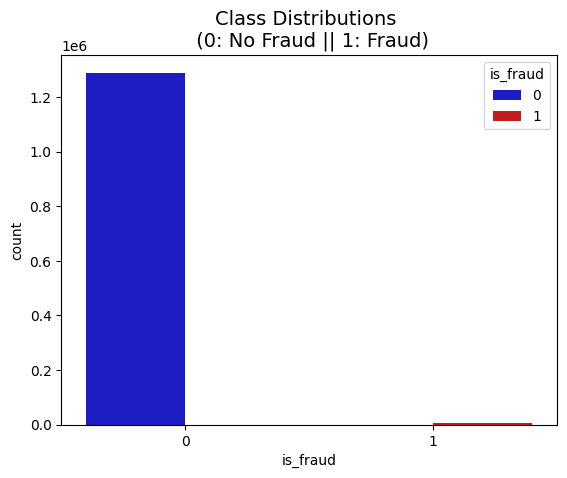

In [46]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='is_fraud', data=dataset,hue='is_fraud', palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

**<h1>Insights</h1>**
<li><b>In this dataset, there are both numerical and categorical variables.</b></li>
<li><b>There are total 1296675 rows and 23 columns.</b></li>
<li><b>There are 10 numerical variables and 13 categorical variables.</b></li>
<li><b>The output or label column is 'is_fraud'.</b></li>
<li><b>'is_fraud' is detected as an integer, not as an object.</b></li>
<li><b>There are 13 categorical variables, which needs to be encoded as numerical</b></li>
<li><b>There is no missing value in any of the columns.</b></li>
<li><b>The no fraud data is 99% of the whole dataset</b></li>
<li><b>Conclusion: dataset is imbalanced, no fraud data is 99 percent time</b></li>

In [11]:
dataset = dataset.drop_duplicates()
dataset.count()

trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

**<h4>Checking Missing Value</h4>**

In [9]:
def check_missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
check_missing_values(dataset)

,Missing_Number,Missing_Percent
trans_date_trans_time,0,0.0
cc_num,0,0.0
merch_long,0,0.0
merch_lat,0,0.0
unix_time,0,0.0
trans_num,0,0.0
dob,0,0.0
job,0,0.0
city_pop,0,0.0
long,0,0.0


In [1]:
# plt.figure(figsize=(8,8))
# plt.title('Visualizing Missing Values')
# sns.heatmap(dataset.isna().transpose(),
#             cmap="YlGnBu",
#             cbar_kws={'label': 'Missing Data'})
# plt.show()

<li><b>We have no missing values in any column of the whole datasets</li></b>

**<h1>Temporal Analysis</h1>**
<li><b>Convert trans_date_trans_time to Datetime</b></li>

In [48]:
dataset['trans_date_trans_time'] = pd.to_datetime(dataset['trans_date_trans_time'])

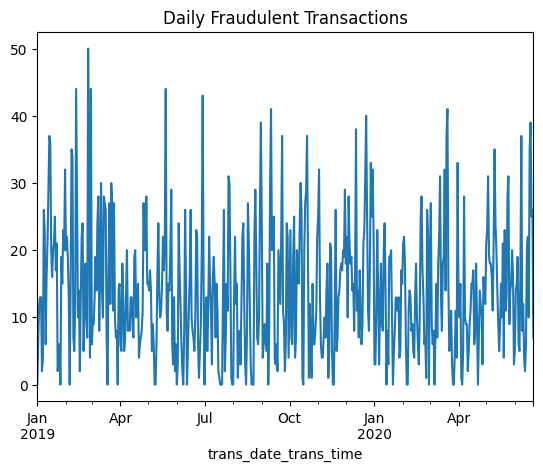

In [49]:
dataset.set_index('trans_date_trans_time')['is_fraud'].resample('D').sum().plot()
plt.title('Daily Fraudulent Transactions')
plt.show()

**<h3>Conclusion</h3>**
<li><b>Generally, the fraudulent transaction is distributed over all month</b></li>
<li><b>However, there is certain rise is first phase of each month</b></li>

**<h1>Exploratory Data Analysis</h1>**

**<h3>Categorical Variables and Univariate Analysis</h3>**

In [12]:
def categories_count(df, col_name):
    count = df[col_name].value_counts().tolist()
    categories = df[col_name].value_counts().index.tolist()
    count_df = pd.DataFrame({'Column_Name' : categories, 'Count' : count})
    return count_df

In [18]:
def univariate_barplot(df, xlabel, ylabel="Frequency"):
    ax=plt.figure(figsize=(15,4))
    ax = sns.barplot()
    ax = sns.barplot(x='Column_Name',y='Count',data = df)
    ax.set_title("Distribution of {} in the dataset".format(xlabel))
    ax.set(xlabel=xlabel, ylabel=ylabel)
    total = df['Count'].sum()
    for plot in ax.patches:
        height = plot.get_height()
        height_percentage = "{:.1f}%".format((100 * height)/ total)
        ax.text(plot.get_x()+plot.get_width()/2., height + 5,height_percentage ,ha="center")
    plt.show()

In [78]:
def univariate_countplot(df,xlabel, ylabel="Frequency"):
    ax=plt.figure()
    ax= sns.countplot(x='Column_Name',data = df)
    ax.set_title("Distribution of {} in the dataset".format(xlabel))
    ax.set(xlabel=xlabel, ylabel=ylabel)
    plt.show()

**<h4>trans_date_trans_time,merchant,category,first,last, gender,
street,city,state,job,dob,trans_num</h4>**

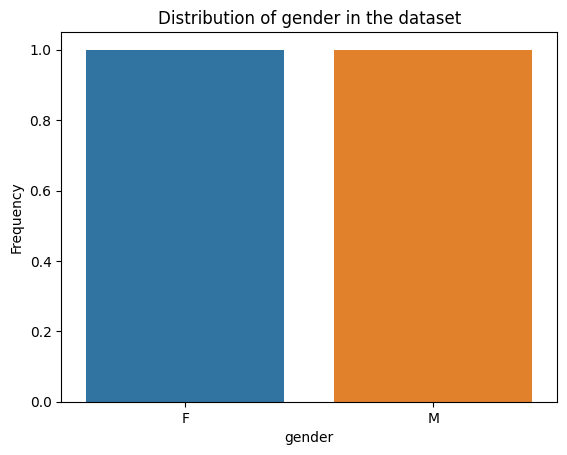

In [79]:
gender_count_df = categories_count(dataset,'gender')
# univariate_barplot(gender_count_df, xlabel='Gender')
univariate_countplot(gender_count_df,'gender')

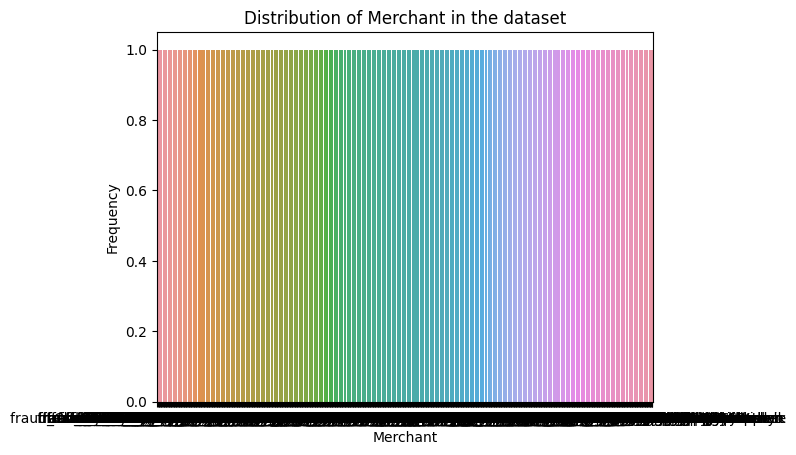

In [80]:
merchant_count_df = categories_count(dataset,'merchant')
merchant_count_df['Column_Name'].unique()
univariate_countplot(merchant_count_df, xlabel='Merchant')

posx and posy should be finite values
posx and posy should be finite values


14


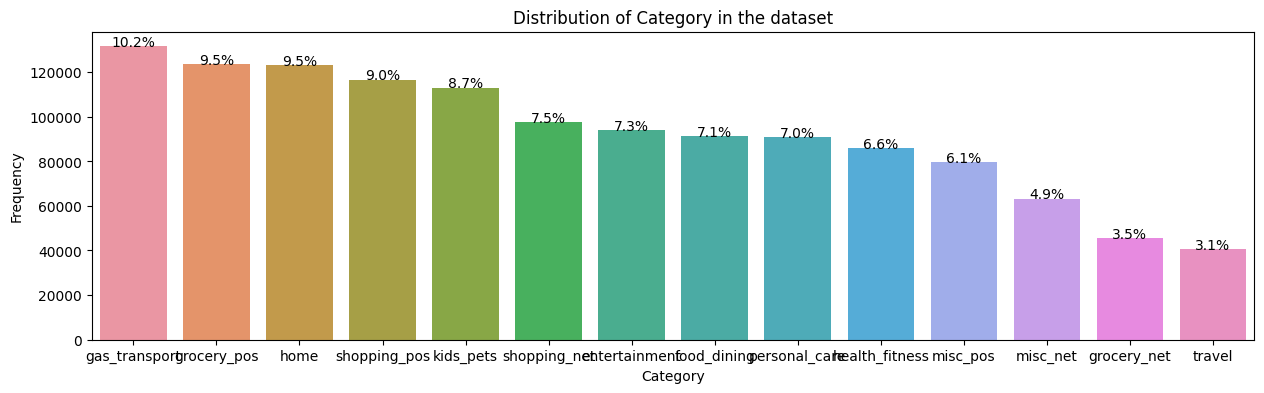

In [69]:
category_count_df = categories_count(dataset,'category')
print(len(category_count_df['Column_Name'].unique()))
univariate_barplot(category_count_df, xlabel='Category')

In [71]:
first_count_df = categories_count(dataset,'first')
len(first_count_df['Column_Name'].unique())
# univariate_barplot(first_count_df, xlabel='First')


352

In [72]:
last_count_df = categories_count(dataset,'last')
len(last_count_df['Column_Name'].unique())
# univariate_barplot(last_count_df, xlabel='Last')

481

In [73]:
street_count_df = categories_count(dataset,'street')
len(street_count_df['Column_Name'].unique())
# univariate_barplot(street_count_df, xlabel='Street')

983

In [74]:
city_count_df = categories_count(dataset,'city')
len(city_count_df['Column_Name'].unique())
# univariate_barplot(city_count_df, xlabel='City')

894

In [76]:
state_count_df = categories_count(dataset,'state')
len(state_count_df['Column_Name'].unique())
# univariate_barplot(state_count_df, xlabel='State')

51

In [77]:
job_count_df = categories_count(dataset,'job')
len(job_count_df['Column_Name'].unique())
# univariate_barplot(job_count_df, xlabel='Job')

494

In [31]:
dob_count_df = categories_count(dataset,'dob')
dob_count_df['Column_Name'].unique()
# univariate_barplot(dob_count_df, xlabel='DOB')

array(['1977-03-23', '1981-08-29', '1988-09-15', '1955-05-06',
       '1995-07-12', '1983-07-25', '1987-10-28', '1984-06-03',
       '1999-03-05', '1998-03-19', '1942-01-06', '1960-01-13',
       '1997-08-22', '1993-04-08', '1983-02-08', '1990-10-19',
       '1987-09-26', '1975-07-31', '1984-09-01', '1989-07-17',
       '1971-11-02', '1978-10-01', '1975-12-20', '1974-07-19',
       '1989-04-08', '1985-03-19', '1972-05-04', '1972-06-12',
       '1976-01-02', '1977-02-22', '1982-02-11', '1989-12-17',
       '1976-10-09', '1985-06-18', '1988-03-25', '1984-12-24',
       '1988-10-26', '1987-04-23', '1992-07-24', '1990-11-07',
       '1971-04-25', '1975-11-30', '1978-06-21', '1986-01-30',
       '1979-04-12', '1985-01-01', '1972-09-22', '1981-10-24',
       '1997-03-12', '1972-11-28', '2000-02-20', '1996-04-10',
       '2000-06-13', '1998-10-07', '1997-09-22', '1997-07-05',
       '2004-05-08', '1975-07-07', '1972-07-18', '1982-07-30',
       '1984-02-29', '1991-10-22', '1985-04-04', '1993-

In [32]:
trans_num_count_df = categories_count(dataset,'trans_num')
trans_num_count_df['Column_Name'].unique()
# univariate_barplot(trans_num_count_df, xlabel='Trans Num')

array(['0b242abb623afc578575680df30655b9',
       'c85864e7e7cf0be6d1b8597977b8afea',
       '1a8a2a05638a5503cc6bb8d5735efcc1', ...,
       '5ce4e974bf15b7d9f133c6eedb81ceb1',
       '64d601ddeaf4eba8b191bd1859998209',
       '8f7c8e4ab7f25875d753b422917c98c9'], dtype=object)

In [33]:
trans_date_trans_time_count_df = categories_count(dataset,'trans_date_trans_time')
trans_date_trans_time_count_df['Column_Name'].unique()
# univariate_barplot(trans_date_trans_time_count_df, xlabel='trans_date_trans_time')

array(['2019-04-22 16:02:01', '2020-06-01 01:37:47',
       '2020-06-02 12:47:07', ..., '2019-07-13 18:35:46',
       '2019-07-13 18:35:41', '2020-06-21 12:13:37'], dtype=object)

**<h3>Univariate Analysis for Numerical Variable</h3>**

In [82]:
def histogram_plot(df, column_name):
    df[column_name].hist(bins=30, figsize=(15, 10))
    plt.show()

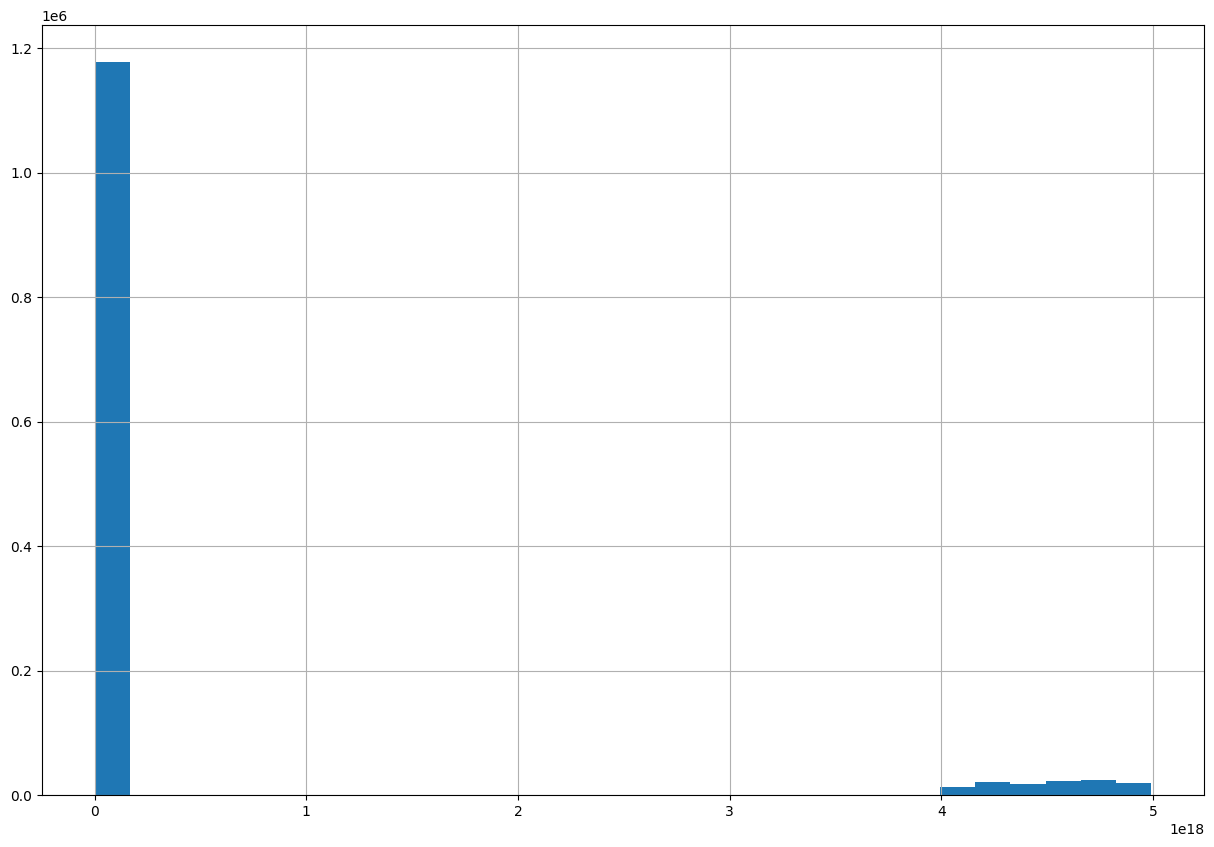

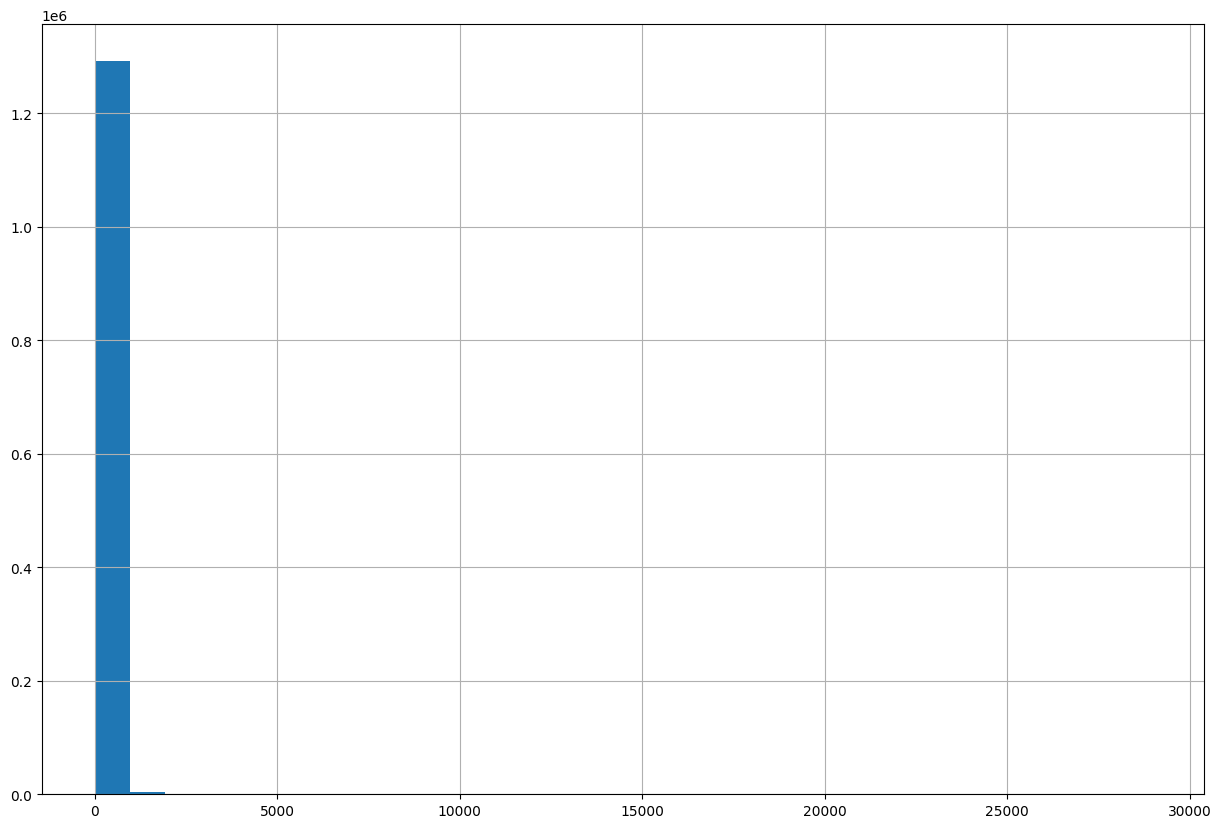

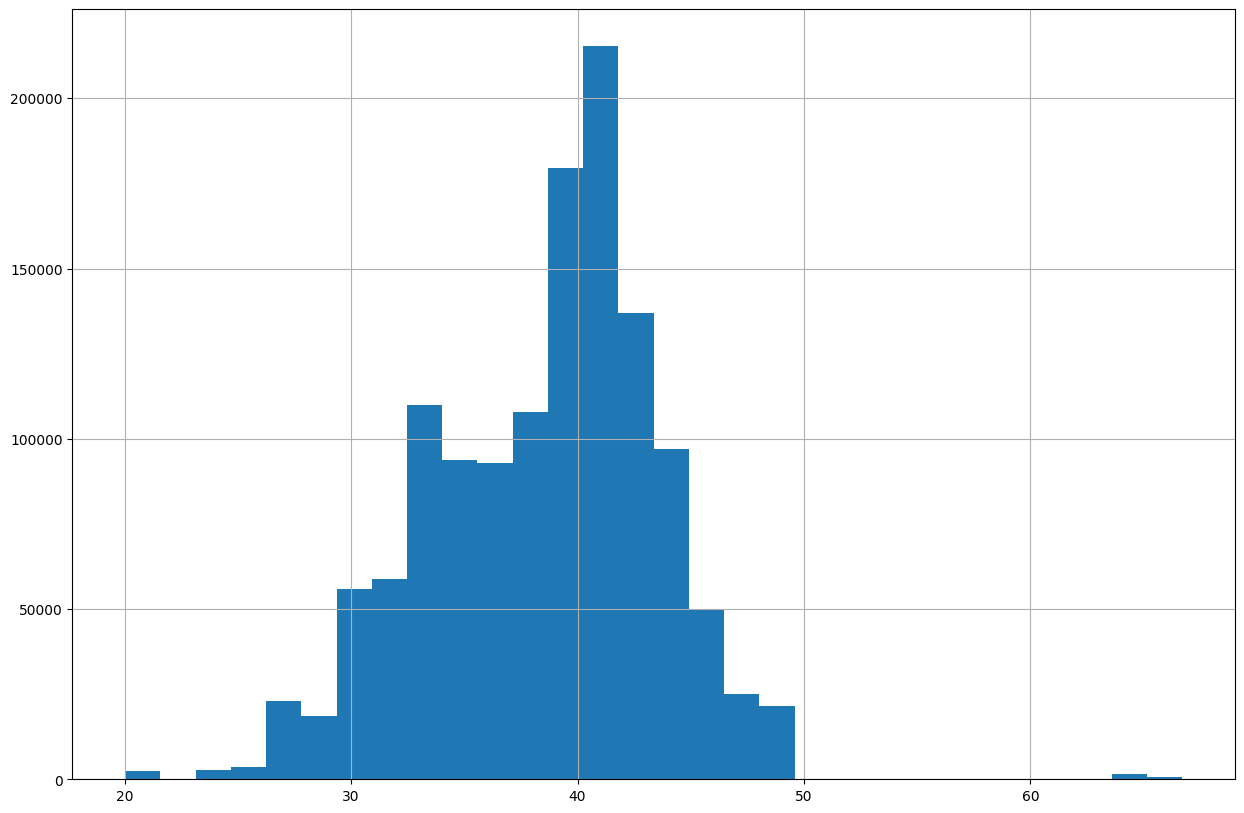

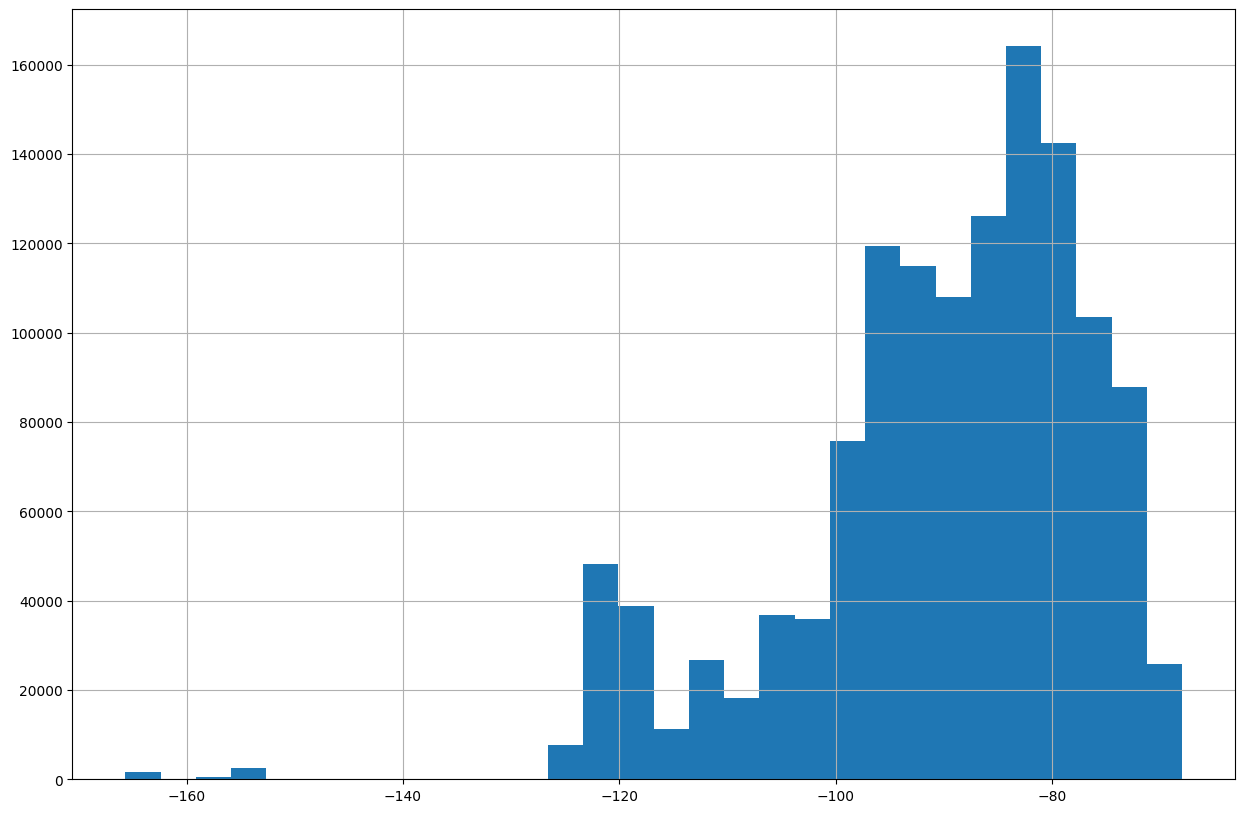

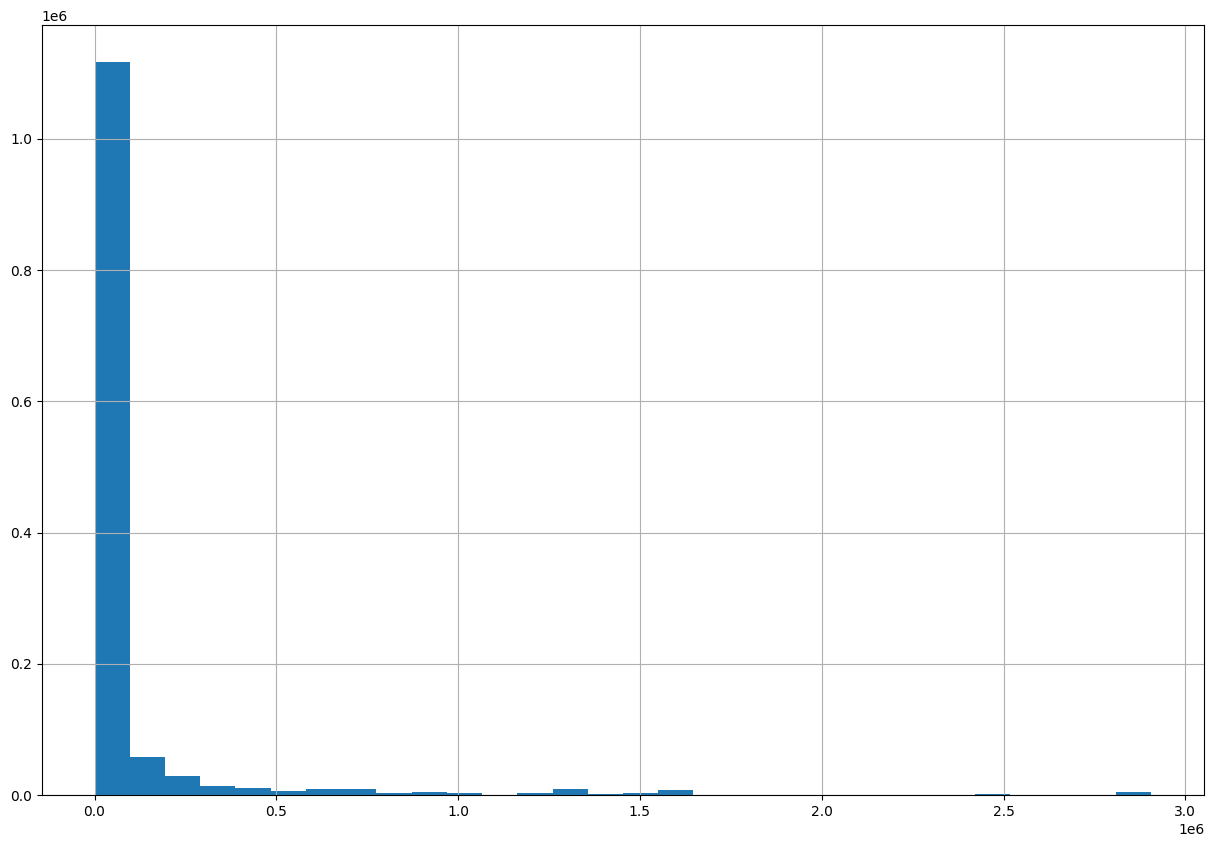

KeyboardInterrupt: 

In [85]:
numerical_columns = ['cc_num','amt', 'lat','long', 'city_pop','trans_num', 'unix_time', 'merch_lat',
       'merch_long']
for i in numerical_columns:
    histogram_plot(dataset, i)

**<h3>Bivariate Analysis</h3>**

In [ ]:
def scatterplot_display(dataset, variable1, variable2):
    ax=plt.figure(figsize=(6,6))
    ax = sns.scatterplot(x=variable1, y=variable2, data = dataset)
    ax.set_title(str(variable1)+" vs "+ str(variable2))
    ax.set(xlabel=variable1, ylabel=variable2)
    plt.axhline(y=13, c='red', linestyle='dashed')
    plt.axhline(y=16, c='green', linestyle='dashed')
    plt.show()

In [83]:
def boxplot_(df, xlabel, ylabel):
    x=plt.figure()
    ax= sns.boxplot(x=xlabel, y=ylabel, data=df)
    ax.set_title("Distribution of {} and {} in the dataset".format(xlabel, ylabel))
    ax.set(xlabel=xlabel, ylabel=ylabel)
    plt.show()


**<h4>Bivariate Analysis</h4>**

<li><b>Bivariate analysis is done to understand the relationship between two variables</b></li>
<li><b>Relationship between gender and the category of work</b></li>
<li><b>Relationship between gender and the Job</b></li>

**<h4>TODO: Let's make some assumptions on data</h4>**

In [ ]:
scatterplot_display(dataset, 'gender', 'category')
# scatterplot_display(dataset, 'gender', 'job')

Boxplot: visual sense of the distributions of various variables within a given Series or Series by category using boxplots.

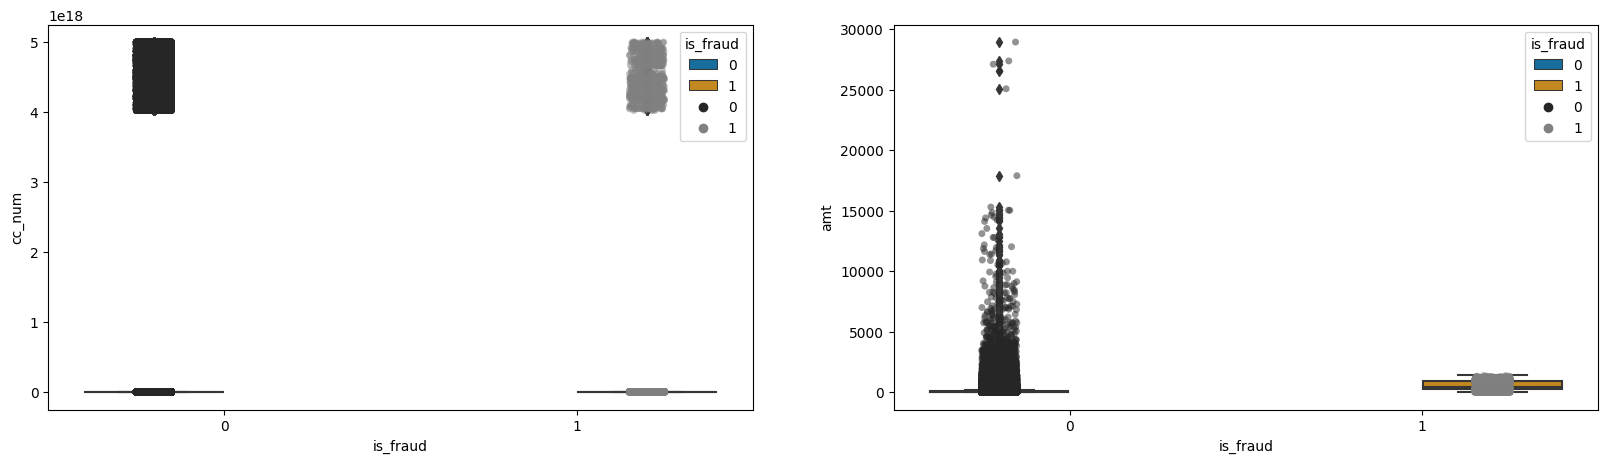

In [44]:
cols = ['cc_num', 'amt']
f, axes = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
for index,col in enumerate(cols):
    sns.boxplot(x="is_fraud", y=col, hue="is_fraud", palette="colorblind", data=dataset, ax=axes[index]) 
    sns.stripplot(x='is_fraud', y=col,  data=dataset,dodge=True,jitter=True,marker='o',ax=axes[index],alpha=0.5,palette='dark:grey',hue='is_fraud')
plt.show()
plt.clf()
plt.close()


Distribution plots are used to visualize univariate distributions of observations

They can be used to identify outliers, identify how normal a dataset is, and whether there are potential gaps in your dataset, along with other applications.

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.distplot(dataset['amt'],ax=axes[0])
sns.distplot(dataset['cc_num'],ax=axes[1])

plt.show()
plt.clf()
plt.close()

In [ ]:
sns.jointplot(y='is_fraud',x='amt',data=dataset,kind='hex')